# Importações

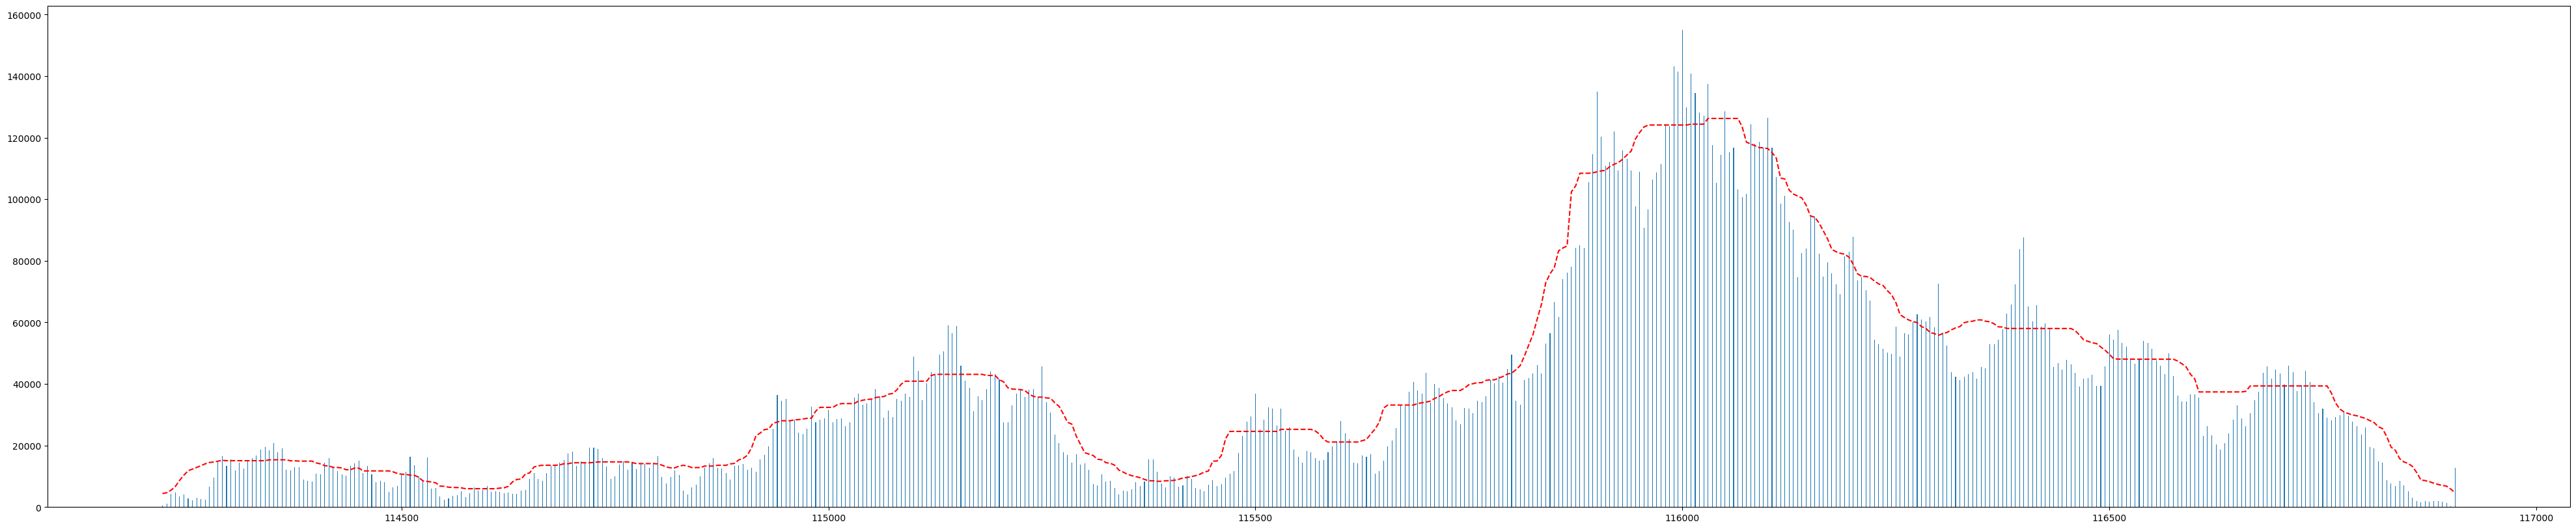

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import datetime
import numpy as np
mt5.initialize()
ativo ='WIN$N'
ticks = pd.DataFrame(mt5.copy_ticks_range('WIN$N',datetime.datetime(2023,11,1),datetime.datetime(2023,11,2),mt5.COPY_TICKS_ALL))
ticks['time'] =pd.to_datetime(ticks['time'],unit='s')
grupo = ticks.groupby('last').agg({'volume':'sum'})
grupo['media_volume'] = grupo['volume'].rolling(window = 30, center=True ,min_periods=1).quantile(q=0.65)
x = tuple((grupo.loc[(grupo['volume'] == grupo['volume'].max())].reset_index()).values)
w = list(grupo['media_volume'].values)
plt.figure(figsize=(50,10))
plt.bar(grupo.index,grupo['volume'])
plt.plot(grupo.index,grupo['media_volume'], color='r', linestyle='--', label='Média')

plt.show()

# Puxando regiões de borda

In [4]:
regiao = {}

dia = datetime.datetime(year=2023,month=9,day=2)
dia_1 = dia + datetime.timedelta(days=1)
for i in range(400):
    ticks = pd.DataFrame(mt5.copy_ticks_range(ativo,dia,dia_1,mt5.COPY_TICKS_ALL))
    grupo = ticks.groupby('last').agg({'volume':'sum'}) 
    grupo['media_volume'] = grupo['volume'].rolling(window = 9, center=True ,min_periods=1).mean()
    abaixo_media = grupo.loc[grupo['volume']<grupo['media_volume']]
    if len(grupo['volume'])!=0:
            regiao[dia.date()] = abaixo_media

            
    if dia == datetime.datetime(year=2023,month=10,day=8):
        break
        
    dia = dia + datetime.timedelta(days=1)
    dia_1 = dia_1 + datetime.timedelta(days=1)




KeyboardInterrupt



In [ ]:
regiao

In [14]:
ticks = mt5.copy_ticks_from(ativo, datetime.datetime(2023, 11, 3), -500000, mt5.COPY_TICKS_ALL)
ticks = pd.DataFrame(ticks)
ticks['time']=pd.to_datetime(ticks['time'], unit='s')

In [15]:
ticks

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2023-11-03 09:00:41,0.0,0.0,117765.0,623,1699002041141,312,623.0
1,2023-11-03 09:00:41,0.0,0.0,117765.0,1404,1699002041141,312,1404.0
2,2023-11-03 09:00:41,0.0,0.0,117765.0,861,1699002041142,312,861.0
3,2023-11-03 09:00:41,0.0,0.0,117765.0,1353,1699002041143,312,1353.0
4,2023-11-03 09:00:41,0.0,0.0,117765.0,2145,1699002041143,312,2145.0
...,...,...,...,...,...,...,...,...
1371575,2023-11-03 18:01:19,0.0,0.0,119785.0,769,1699034479595,312,769.0
1371576,2023-11-03 18:01:19,0.0,0.0,119785.0,418,1699034479595,312,418.0
1371577,2023-11-03 18:01:19,0.0,0.0,119785.0,987,1699034479595,312,987.0
1371578,2023-11-03 18:01:19,0.0,0.0,119785.0,2142,1699034479596,312,2142.0
